In [1]:
# run this to shorten the data import from the files
import os
cwd = os.getcwd()+'/'
path_data = os.path.join(os.path.dirname(os.getcwd()), 'datasets/')


In [2]:
import pandas as pd
import numpy as np

btc_sp_df = pd.read_csv(path_data+'btc_sp.csv')
btc_sp_df.head()

,Date,Open_BTC,High_BTC,Low_BTC,Close_BTC,Close_SP500,Open_SP500,High_SP500,Low_SP500
0,2017-08-07,3212.780029,3397.679932,3180.889893,3378.939941,2480.91,2477.14,2480.95,2475.88
1,2017-08-08,3370.219971,3484.850098,3345.830078,3419.939941,2474.92,2478.35,2490.87,2470.32
2,2017-08-09,3420.399902,3422.760010,3247.669922,3342.469971,2474.02,2465.35,2474.41,2462.08
3,2017-08-10,3341.840088,3453.449951,3319.469971,3381.280029,2438.21,2465.38,2465.38,2437.75
4,2017-08-11,3373.820068,3679.719971,3372.120117,3650.620117,2441.32,2441.04,2448.09,2437.85


In [3]:
# exercise 01

"""
Sampling and point estimates

You have access to a small trading history of Bitcoin (BTC) and the S&P 500 (SP500). You decide to choose ninety consecutive days to analyze the percent growth of each asset over the same time period.

You'll start by selecting an initial row number. To ensure that you get a sample of 90 consecutive rows, you'll need to select this starting row number from a range of values from zero to the length of btc_sp_df, excluding the last 90 rows. Your goal is to use this sample to better understand the growth of both assets in general.

The trading data has been loaded into btc_sp_df, as have the packages pandas as pd and NumPy as np.
"""

# Instructions

"""

    Use np.random.choice() to select an initial_row_number from a range of values that begins with zero and ends with the length of btc_sp_df, excluding the last 90 rows.
    Select rows from initial_row_number to initial_row_number + 90 using .iloc.
---

    Compute the percentage increase of SP500 over this 90-day period using the Close_SP500 column of your sample_df.
    Similarly, compute the percentage increase of BTC over this 90-day period using the Close_BTC column of your sample_df.

"""

# solution

# Select a random starting row number, not including the last 90 rows
initial_row_number = np.random.choice(range(btc_sp_df.shape[0] - 90))

# Use initial_row_number to select the next 90 rows from that row number
sample_df = btc_sp_df.iloc[initial_row_number:(initial_row_number + 90)]

# Use sample_df to compute the percent increase in Close_SP500
sp500_pct_change = (sample_df.iloc[0]['Close_SP500'] - sample_df.iloc[-1]['Close_SP500']) / sample_df.iloc[0]['Close_SP500']

# Use sample_df to compute the percent increase in Close_BTC
btc_pct_change = (sample_df.iloc[0]['Close_BTC'] - sample_df.iloc[-1]['Close_BTC']) / sample_df.iloc[0]['Close_BTC']

print('SP500: ', sp500_pct_change, '\n', 'BTC: ', btc_pct_change)

#----------------------------------#

# Conclusion

"""
You're off to a great start! Notice how the SP500 and BTC had different percent increases over the 90 day period. However, the exact value you get depends heavily on exactly which 90 days you're looking at. In other words, your point estimate depends on your sample.
"""

SP500:  -0.1166077516259294 
 BTC:  -0.6353641889533487


"\nYou're off to a great start! Notice how the SP500 and BTC had different percent increases over the 90 day period. However, the exact value you get depends heavily on exactly which 90 days you're looking at. In other words, your point estimate depends on your sample.\n"

In [4]:
# exercise 02

"""
Repeated sampling, point estimates and inference

In the previous exercise, you used a single sample of ninety days to make your conclusion. However, what if you had a different ninety days. Would your conclusions be different?

One way to assess this is by taking repeated samples. By repeatedly sampling from your data and computing your point estimate you can see how it changes.

The same data btc_sp_df has been loaded for you, as have the packages Pandas as pd and NumPy as np.
"""

# Instructions

"""

    Write a for loop that runs ten times.
    Inside the loop, select a random starting row number, avoiding the last 90 row numbers.
    Select the ninety rows after the starting row.
    Using your sample_df, compute the percent change of BTC closing price using the Close_BTC column.
---
Question

Moving from just a single point estimate to repeated point estimates gives you a clearer picture of how reliable your point estimate is for inference. Notice how much variation there is in the change in BTC, depending on the days selected. This suggests that a single point estimate isn't great for inference.

Based on what you observed, which of the following conclusions are supported by your analysis?
[The change in BTC prices cannot be easily modeled using one or multiple point estimates, so further analysis would be needed before purchasing BTC.]
"""

# solution

# Write a for loop which repeats the sampling ten times
for i in range(10):
    # Select a random starting row number
    initial_row_number = np.random.choice(range(btc_sp_df.shape[0] - 90))
    # Select the next 90 rows after the starting row
    sample_df = btc_sp_df.iloc[initial_row_number:initial_row_number + 90]
    # Compute the percent change in closing price of BTC and print it
    btc_pct_change = (sample_df.iloc[0]['Close_BTC'] - sample_df.iloc[-1]['Close_BTC']) / sample_df.iloc[0]['Close_BTC']
    print(btc_pct_change)

#----------------------------------#

# Conclusion

"""
Great job refraining from making a conclusion at the first sight of a point estimate! You saw how closer analysis often reveals a single point estimate to be unreliable.
"""

0.1428212208185958
-0.5267592127553563
0.33208287135964093
0.13287231416162978
0.04716740458593408
-0.9090120064188275
-2.001963836832239
0.28091807406542924
-0.40775429867775476
-0.7061472182923967


'\nGreat job refraining from making a conclusion at the first sight of a point estimate! You saw how closer analysis often reveals a single point estimate to be unreliable.\n'

In [15]:
import matplotlib.pyplot as plt

btc_pct_change_list = np.genfromtxt(path_data+'btc_pct_change_list.csv', delimiter=',')
btc_pct_change_list[:5]

array([0.        , 0.29628122, 0.09562326, 0.44833387, 0.47600012])

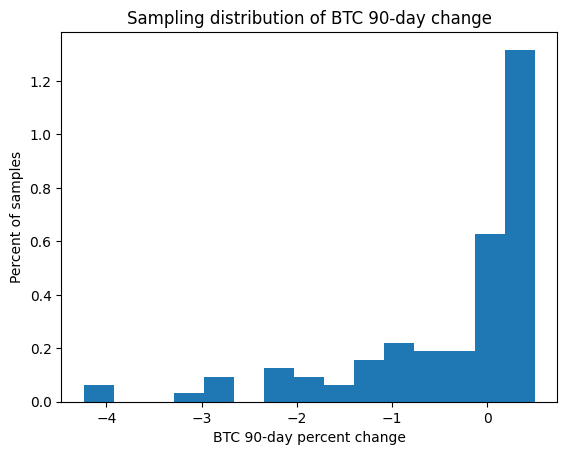

'\nVisualizing your data is a great complement to computing summary statistics! Notice that although a percent change in BTC around zero was the most common, it was far from the only outcome. The long tail to the left indicates that periods with a large drop happen often enough to not just be dismissed as outliers.\n'

In [16]:
# exercise 03

"""
Visualizing samples

You saw that a single sample can give an unreliable point estimate. To investigate this you decide to take 100 samples of 90 consecutive days of BTC trading data. For each of these 100 samples you compute the percent change in BTC over that time period. You then want to plot this data as a histogram to understand the sampling distribution.

Although these visualizations can be created with plt.hist(), for this exercise, you'll practice using the .plot() argument on a DataFrame, with the arguments bins and density.

The 100 samples of percent change has already been loaded for you in btc_pct_change_list. This is a list of length 100 with each entry being the percent change in BTC for one of the 100 samples chosen. Matplotlib has also been imported as plt.
"""

# Instructions

"""

    Plot a histogram of BTC percent change with 15 bins with the y-values displaying the density, rather than the count.
    Set the x-axis label to "BTC 90-day percent change".
    Set the y-axis label to "Percent of samples".
    Set the title to "Sampling distribution of BTC 90-day change".

"""

# solution

# Plot a histogram of percent changes
plt.hist(btc_pct_change_list, bins=15, density=True)
# Set the x-axis label
plt.xlabel('BTC 90-day percent change')
# Set the y-axis label
plt.ylabel('Percent of samples')
# Set the title
plt.title('Sampling distribution of BTC 90-day change')

plt.show()

#----------------------------------#

# Conclusion

"""
Visualizing your data is a great complement to computing summary statistics! Notice that although a percent change in BTC around zero was the most common, it was far from the only outcome. The long tail to the left indicates that periods with a large drop happen often enough to not just be dismissed as outliers.
"""

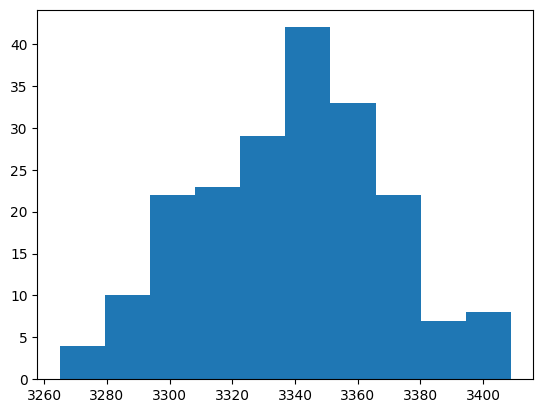

"\nFeeling comfortable constructing and analyzing sampling distributions is an important skill in sound inference. Notice how the sampling distribution is approximately normal, indicating that a confidence interval is a valid choice for estimating the closing price of the SP500. You'll do that next!\n"

In [17]:
# exercise 04

"""
Normal sampling distributions

You'd like to estimate a realistic mean closing price for the S&P 500 over a subset of its trading history. This seems like a natural application of a confidence interval, since you have a sample statistic and want to use it to estimate a population statistic. However, your first step should be to check if the sampling distribution is approximately normal. In this exercise, you'll do exactly that. In the next exercise, you'll use this result to create your confidence interval.

The same data btc_sp_df has been loaded for you, as have the packages pandas as pd, NumPy as np and Matplotlib as plt.
"""

# Instructions

"""

    Define a variable num_samples as the desired number of samples (200), and define an empty list sample_means to store the mean from each of the 200 samples.
    Write a for loop which will repeat the sampling process num_samples times.
    Select 500 random S&P500 closing prices from the Close_SP500 column of btc_sp_df.
    Compute the mean of each of these samples and store them in sample_means.

"""

# solution

# Define the number of samples to take and store the sample means
num_samples = 200
sample_means = []

# Write a for loop which repeats the sampling num_samples times
for i in range(num_samples):
  # Select 500 random Close_SP500 prices 
  sp500_sample = np.random.choice(btc_sp_df['Close_SP500'], size=500)
  # Compute mean closing price and save it to sample_means
  sample_means.append(sp500_sample.mean())
    
plt.hist(sample_means)
plt.show()

#----------------------------------#

# Conclusion

"""
Feeling comfortable constructing and analyzing sampling distributions is an important skill in sound inference. Notice how the sampling distribution is approximately normal, indicating that a confidence interval is a valid choice for estimating the closing price of the SP500. You'll do that next!
"""

In [20]:
# exercise 05

"""
Calculating confidence intervals

Now that you've demonstrated that the sampling distribution for the closing price of the S&P 500 is approximately normally distributed, you'll compute a confidence interval! You want to estimate the mean closing price of the S&P 500, and calculating a confidence interval will do just that for you.

The same data btc_sp_df has been loaded for you, as have the packages pandas as pd, NumPy as np and scipy.stats as stats.
"""

# Instructions

"""

    Select a random sample of 500 days from the column Close_SP500.
    Calculate the mean of this random sample.
    Calculate the standard error of this random sample as the standard deviation divided by the square root of the sample size.
    Calculate a 95% confidence interval using the values you just calculated.

"""

# solution

import scipy.stats as stats

# Select a sample of 500 random days
sample_closing = np.random.choice(btc_sp_df['Close_SP500'], size=500)

# Calculate the mean of the sample
sample_mean = sample_closing.mean()

# Calculate the standard error of the sample
sample_se = sample_closing.std() / np.sqrt(sample_closing.shape[0])

# Calculate a 95% confidence interval using this data
interval = stats.norm.interval(confidence=0.95,
                   loc=sample_mean,
                   scale=sample_se)

print(interval)
#----------------------------------#

# Conclusion

"""
Moving from point estimates to confidence intervals opens up a new world of statistical tools! You now are gaining the ability to make inference based on more than just a single number. Notice how your confidence interval is relatively narrow, since the sample size was large enough to give you a reasonable estimate of the mean.
"""

(3285.8570535838658, 3404.214346416135)


'\nMoving from point estimates to confidence intervals opens up a new world of statistical tools! You now are gaining the ability to make inference based on more than just a single number. Notice how your confidence interval is relatively narrow, since the sample size was large enough to give you a reasonable estimate of the mean.\n'

In [23]:
# exercise 06

"""
Drawing conclusions from samples

You've seen how random sampling can be used to choose a sample of data which is (hopefully!) representative of the population you are studying. You've also seen how bias in sampling procedure can result in conclusions that are suspect at best, and completely wrong at worst.

In this exercise you'll analyze the average closing price of the S&P 500. If you take two different samples of trading days and compute confidence intervals for each, should you expect to see the same result? It's time for you to dive in and see!
"""

# Instructions

"""

    Randomly select 500 rows from btc_sp_df.
    Use stats.norm.interval() to create a 95% confidence interval for Close_SP500 column of your sampled DataFrame.
---

    Select the first 500 rows from btc_sp_df.
    Compute the 95% confidence interval again using first_500_df.
---
Question

Notice that the sample_ci and first_500_ci values in the console are different. How is this possible?
[The two samples are different, and thus the mean and standard error of the trading days are also different.]
"""

# solution

# Sample 1: Select a random sample of 500 rows
sample_df = btc_sp_df.sample(n=500)

a = sample_ci = stats.norm.interval(confidence=0.95, 
	loc=sample_df['Close_SP500'].mean(), 
	scale=sample_df['Close_SP500'].std()/np.sqrt(500))

# Sample 2: Select the first 500 rows
first_500_df = btc_sp_df.iloc[:500]

# Compute a 95% confidence interval for the closing price of SP500
b = first_500_ci = stats.norm.interval(confidence=0.95, 
	loc=first_500_df['Close_SP500'].mean(), 
	scale=first_500_df['Close_SP500'].std()/np.sqrt(500))

print(a,b)

#----------------------------------#

# Conclusion

"""
Understanding the concepts underlying confidence intervals really equips you to understand large data sets! While your samples may be randomly chosen, their corresponding mean and standard error are vastly different. This causes us to get completely different confidence intervals! Keeping this in mind when choosing your sample is extremely important, and will help you produce reliable, repeatable analysis.
"""

(3275.8524645417383, 3398.6140954582615) (2719.898053221996, 2744.858786778004)


'\nUnderstanding the concepts underlying confidence intervals really equips you to understand large data sets! While your samples may be randomly chosen, their corresponding mean and standard error are vastly different. This causes us to get completely different confidence intervals! Keeping this in mind when choosing your sample is extremely important, and will help you produce reliable, repeatable analysis.\n'